# Data Collection And Storage Project

## Analysis of ride-sharing company

#### Objective: Prepare an analysis for Zuber, a ride-sharing company, in order to identify patterns and understand passenger preferences and the impact of external factors on rides

### Description of the data

**project_sql_result_01.csv**
It contains the following data:
> - company_name: taxi company name
> - trips_amount: the number of rides for each taxi company on November 15-16, 2017

**project_sql_result_04.csv**
It contains the following data:
> - dropoff_location_name: Chicago neighborhoods where rides ended
> - average_trips: the average number of rides that ended in each neighborhood in November 2017

**project_sql_result_07.csv**
It contains data on rides from the Loop to O'Hare International Airport. Remember, these are the table's field values:
> - start_ts: pickup date and time
> - weather_conditions: weather conditions at the moment the ride started
> - duration_seconds: ride duration in seconds

## Import Data

In [3]:
import pandas as pd
from io import BytesIO
import requests
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
import scipy
from scipy import stats as st

In [4]:
spreadsheet_id = '1LLDQ-rq6BxQVGxcQh7Ap7bd31JTiS3gwtfYP0iGrVpM'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
df_results01 = pd.read_csv(BytesIO(r.content))

from io import BytesIO
import requests
spreadsheet_id = '1zhGOQ8NUCkCuC0YGymZrSM0s6k8VGFAa8U3xan2dcIs'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
df_results04 = pd.read_csv(BytesIO(r.content))

from io import BytesIO
import requests
spreadsheet_id = '1wy434ufQ6fQEHYBPaFph9OhkutdM0QgrkCXNEu-oGDs'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
df_results07 = pd.read_csv(BytesIO(r.content))



In [5]:
display(df_results01)
display(df_results01.describe())
display(df_results01.sample())
display(df_results01.info())

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,"2241 - 44667 - Felman Corp, Manuel Alonso",3


,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


,company_name,trips_amount
49,5074 - 54002 Ahzmi Inc,16


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


None

In [6]:
display(df_results04)
display(df_results04.describe())
display(df_results04.sample())
display(df_results04.info())


,dropoff_location_name,average_trips
0,Loop,10727.466670
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
...,...,...
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538


,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466670


,dropoff_location_name,average_trips
13,Uptown,849.666667


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


None

#### Preprocessing

#### Check for Nulls

In [7]:
def get_number_of_na(df):
    df_nulls = pd.DataFrame(df.isnull().sum(),columns=['Missing Values'])
    df_nulls['Percentage of Nulls'] = round(df_nulls['Missing Values'] / df.shape[0]) *100
    return df_nulls
        

In [8]:
get_number_of_na(df_results01)

,Missing Values,Percentage of Nulls
company_name,0,0.0
trips_amount,0,0.0


In [9]:
get_number_of_na(df_results04)

,Missing Values,Percentage of Nulls
dropoff_location_name,0,0.0
average_trips,0,0.0


#### Check for duplicates

In [10]:
display(df_results01.duplicated().sum())

0

In [11]:
display(df_results04.duplicated().sum())

0

#### Data type change

In [12]:
df_results04['average_trips'] = df_results04['average_trips'].astype(int)

In [13]:
df_results04.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dropoff_location_name  94 non-null     object
 1   average_trips          94 non-null     int32 
dtypes: int32(1), object(1)
memory usage: 1.2+ KB


#### Identify the top 10 neighborhoods in terms of drop off

In [14]:
top_10_neighborhoods = df_results04.sort_values(by = 'average_trips', ascending = False).head(10)
top_10_neighborhoods

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546
5,Lake View,2420
6,Grant Park,2068
7,Museum Campus,1510
8,Gold Coast,1364
9,Sheffield & DePaul,1259


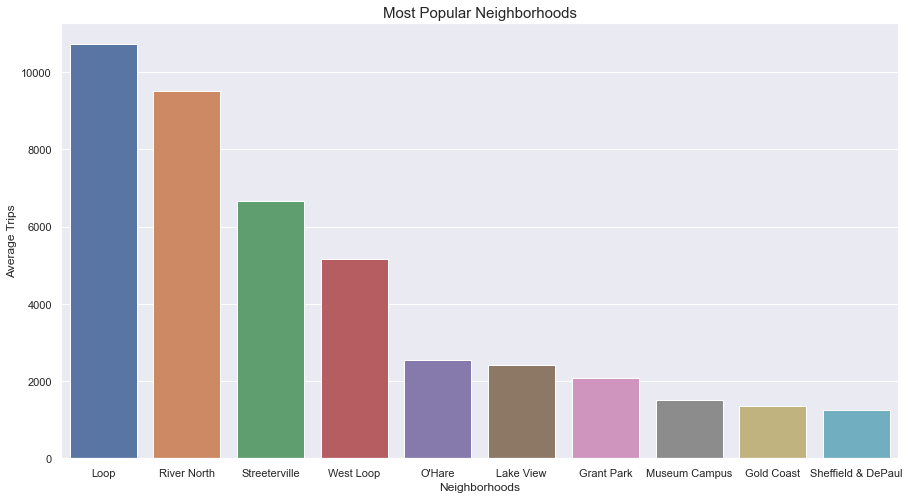

In [15]:
plt.figure(figsize = (15,8))
sns.set(style='darkgrid')
sns.color_palette()
sns.barplot(x=top_10_neighborhoods['dropoff_location_name'],y=top_10_neighborhoods['average_trips'])
plt.xlabel('Neighborhoods')
plt.ylabel('Average Trips')
plt.title('Most Popular Neighborhoods', fontsize =15)
plt.show()

Based on the graph above, the most popular neighborhood is Loop followed by River North with Streeterville coming in at third. When combined, these account for more than half of the trips in total. Loop and River North are about a mile and a half from each other, so we can assume that passengers often travel between these two locations. 

#### Taxi companies based on number of rides

In [16]:
top_10_company = df_results01.sort_values(by='trips_amount', ascending=False).head(10)
top_10_company

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


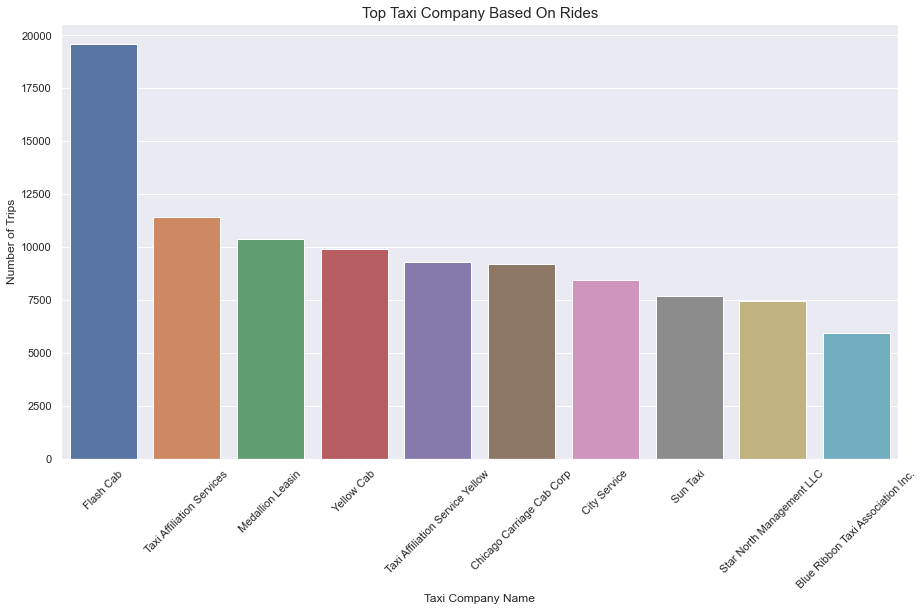

In [17]:
plt.figure(figsize = (15,8))
sns.set(style='darkgrid')
sns.color_palette()
sns.barplot(x=top_10_company['company_name'],y=top_10_company['trips_amount'])
plt.xlabel('Taxi Company Name')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45) 
plt.title('Top Taxi Company Based On Rides',fontsize=15)
plt.show()

Based on the graph above, the most popular taxi company is Flash Cab, which has the largest number of trips, with Taxi Affiliation Services coming in at second.

### Testing hypotheses 

In [18]:
display(df_results07.info())
display(df_results07.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   start_ts            1068 non-null   object
 1   weather_conditions  1068 non-null   object
 2   duration_seconds    1068 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 25.2+ KB


None

,start_ts,weather_conditions,duration_seconds
0,11/25/2017 16:00,Good,2410
1,11/25/2017 14:00,Good,1920
2,11/25/2017 12:00,Good,1543
3,11/4/2017 10:00,Good,2512
4,11/11/2017 7:00,Good,1440


Noticed that the start_ts data type is object so we're going to have to change that to a datetime

In [19]:
df_results07['start_ts']= pd.to_datetime(df_results07['start_ts'])


In [20]:
df_results07.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 25.2+ KB


In [22]:
rainy_rides = df_results07.query('weather_conditions == "Bad"')
rainy_rides.head()

,start_ts,weather_conditions,duration_seconds
6,2017-11-04 16:00:00,Bad,2969
30,2017-11-18 12:00:00,Bad,1980
34,2017-11-04 17:00:00,Bad,2460
51,2017-11-04 16:00:00,Bad,2760
52,2017-11-18 12:00:00,Bad,2460


In [23]:
not_rainy_rides = df_results07.query('weather_conditions == "Good"')
not_rainy_rides.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410
1,2017-11-25 14:00:00,Good,1920
2,2017-11-25 12:00:00,Good,1543
3,2017-11-04 10:00:00,Good,2512
4,2017-11-11 07:00:00,Good,1440


**The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays**

$H_{0}$- **Null Hypothesis**: The average duration of a trip with ***Good*** weather_conditions is the same as the average duration of a trip with ***Bad*** weather_conditions of rides from Loop to O'Hare International Airport

$H_{1}$ - **Alternative Hypothesis**: The average duration of a trip with ***Good*** weather_conditions is different as the average duration of a trip with ***Bad*** weather_conditions of rides from Loop to O'Hare International Airport


In [21]:
rainy_rides['duration_seconds'].mean(), not_rainy_rides['duration_seconds'].mean()

(2427.2055555555557, 1999.6756756756756)

As the calculations show, we expect to reject the null hypothesis

In [22]:
alpha = .05 # critical statistical significance level
                        # if the p-value is less than alpha, we reject the hypothesis

results = st.ttest_ind(
                        rainy_rides['duration_seconds'], 
                        not_rainy_rides['duration_seconds'], 
                        equal_var=True)

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")

p-value:  6.517970327099473e-12
We reject the null hypothesis


Based on the results, the decision is to **reject the null hypothesis**. It means that the average duration of rides from Loop neighborhood to O'Hare International Airport changes on rainy Saturdays. This can also be proven by looking at the average duration on both rainy days and non rainy days: ***2427 seconds or at 40 mins*** on rainy days and ***1999 seconds or 33 mins*** on non rainy days. It makes sense that rainy day trips takes longer as drivers tend to drive slower when it's raining.

## Conclusion

First we looked closely at the data and we found out that there were no missing values and there were no duplicates. We changed ***average_trips*** data type to its appropriate data type.

Based on the exploratoy data analysis, the following conclusions can be drawn:
 - The **Loop** neighborhood is the most popular one followed by  **River North** and **Streeterville**, which in total, accounts for more than half of the trips. Loop and River North are about a mile and half from each other so we can assume that passengers often travel between these two locations
 - The most popular taxi company is **Flash Cab** which has the largest number of trips and **Taxi Affiliation Services** coming in at second.
 
And then we tested the following hypothesis : **The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays**

Based on statistical tests, **we reject the null hypothesis** - the average duration of a trip with ***Good*** weather conditions is different from the average duration of a trip with ***Bad*** weather conditions. This can also be proven by looking at the average duration on both rainy days and non rain days: ***2427 seconds or 40 mins*** on rainy days and ***1999 seconds or 33 mins*** on non rainy days. It makes sense that rainy day trips takes longer as drivers tend to drive slower when it's raining.